# Import Package

In [91]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import balanced_accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, precision_score, roc_auc_score, classification_report
from jcopml.plot import plot_classification_report, plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Import Data

In [2]:
df = pd.read_csv("clean_data.csv")
df.head()

,age,length_of_service,gender_short,STATUS,BUSINESS_UNIT,job_level,dept_category
0,52,17,1,0,0,3,0
1,53,18,1,0,0,3,0
2,54,19,1,0,0,3,0
3,55,20,1,0,0,3,0
4,56,21,1,0,0,3,0


### Keterangan Kolom

1. **Age** : Usia Employee (dalam tahun)
2. **Length_of_Service** : Masa Kerja (dalam tahun)
3. **gender_short** : Jenis Kelamin (Female : 0, Male : 1)
4. **STATUS** : Status Employee (Active : 0, Terminated : 1)
5. **Business_Unit** : Unit Bisnis berdasarkan Tempat kerja (Head Office : 0, Store : 1)
6. **Job_Level** : Kategori Level jabatan di perusahaan (Staff : 0, Manager : 1, Board : 2, Executive : 3)
7. **Dept_Category** : Kategori departemen berdasarkan core (pekerjaan utama), (Business : 0, Customer : 1)

## Check Imbalance Data

In [3]:
df.STATUS.value_counts()

0    48168
1     1485
Name: STATUS, dtype: int64

## Datasets Splitting

In [4]:
X = df.drop(columns="STATUS")
y = df.STATUS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42205, 6), (7448, 6), (42205,), (7448,))

# Training Dataset

## Evaluation Function

**For Confusion Matrix : 0 is Positive**

In [100]:
def eva_metric(model):
    print('Model : ', model)
    print('\n')
    tp, fn, fp, tn = confusion_matrix(y_test, model.predict(X_test)).ravel()
    print('True Positive : ', tp)
    print('True Negative : ', tn)
    print('False Positive : ', fp)
    print('False Negative : ', fn)
    print('\n')
    print("Balanced Accuracy :", balanced_accuracy_score(y_test, model.predict(X_test)))
    print("F1 Score :", f1_score(y_test, model.predict(X_test), pos_label=1))
    print("Recall Score :", recall_score(y_test, model.predict(X_test), pos_label=1))
    print("Precision Score :", precision_score(y_test, model.predict(X_test), pos_label=1))
    print("\n Classification Report : \n", classification_report(y_test, model.predict(X_test)))

## K Nearest Neighbors

### Base

In [6]:
baseKNN = KNeighborsClassifier()

baseKNN.fit(X_train, y_train)

baseKNN.score(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Hyperparameter Tuning

In [11]:
paramKNN = {'n_neighbors': np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17]),
 'p': [1, 2]}

In [12]:
best_KNN = GridSearchCV(KNeighborsClassifier(), paramKNN, cv=5, verbose=1, n_jobs=-1)
best_KNN.fit(X_train, y_train)
print(best_KNN.score(X_test, y_test))
print(best_KNN.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17]), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [64]:
best_KNN = best_KNN.best_estimator_
best_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=1,
           weights='uniform')

## Evaluation Matrix fo Best KNN

In [74]:
auc_KNN = roc_auc_score(y_test, best_KNN.predict(X_test) )
auc_KNN

0.7912722081710553

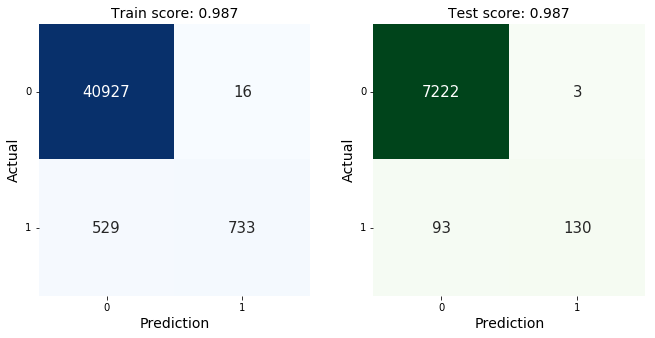

In [62]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, best_KNN)

In [92]:
confusion_matrix(y_test, best_KNN.predict(X_test))

array([[7222,    3],
       [  93,  130]], dtype=int64)

In [93]:
tp, fn, fp, tn = confusion_matrix(y_test, best_KNN.predict(X_test)).ravel()

array([7222,    3,   93,  130], dtype=int64)

In [69]:
print(classification_report(y_test,best_KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7225
           1       0.98      0.58      0.73       223

   micro avg       0.99      0.99      0.99      7448
   macro avg       0.98      0.79      0.86      7448
weighted avg       0.99      0.99      0.99      7448



In [99]:
eva_metric(best_KNN)

Model :  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=1,
           weights='uniform')


True Positive :  7222
True Negative :  130
False Positive :  93
False Negative :  3


Balanced Accuracy : 0.7912722081710553
F1 Score : 0.7303370786516854
Recall Score : 0.5829596412556054
Precision Score : 0.9774436090225563

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7225
           1       0.98      0.58      0.73       223

   micro avg       0.99      0.99      0.99      7448
   macro avg       0.98      0.79      0.86      7448
weighted avg       0.99      0.99      0.99      7448



## RandomForest Classifier

### Base

In [20]:
base_Forest = RandomForestClassifier()

In [21]:
base_Forest.fit(X_train, y_train)
base_Forest.score(X_test, y_test)

0.9879162191192267

### Hyperparameter Tuning

In [22]:
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [23]:
rf_param = {'n_estimators': [100, 150, 200],
 'max_depth': [20, 50, 80],
 'max_features': [0.3, 0.6, 0.8],
 'min_samples_leaf': [1, 5, 10],
 'class_weight':[{0: x, 1: 1-x} for x in [0.05, 0.15, 0.25, 0.30, 0.35]]}

In [24]:
best_Forest = RandomizedSearchCV(RandomForestClassifier(class_weight={0:0.05, 1:0.95}), rf_param,n_iter=50, cv=5, verbose=1, n_jobs=-1)


In [25]:
best_Forest.fit(X_train, y_train)
best_Forest = best_Forest.best_estimator_
print(best_Forest.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200], 'max_depth': [20, 50, 80], 'max_features': [0.3, 0.6, 0.8], 'min_samples_leaf': [1, 5, 10], 'class_weight': [{0: 0.05, 1: 0.95}, {0: 0.15, 1: 0.85}, {0: 0.25, 1: 0.75}, {0: 0.3, 1: 0.7}, {0: 0.35, 1: 0.65}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

## Evaluation Matrix for Best Random Forest Classifier

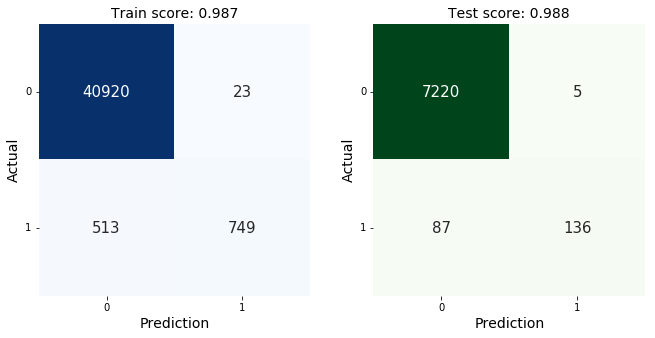

In [67]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, best_Forest)

In [73]:
auc_forest = roc_auc_score(y_test, best_Forest.predict(X_test) )
auc_forest

0.8045867146647633

In [66]:
print(classification_report(y_test,best_Forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7225
           1       0.96      0.61      0.75       223

   micro avg       0.99      0.99      0.99      7448
   macro avg       0.98      0.80      0.87      7448
weighted avg       0.99      0.99      0.99      7448



In [98]:
eva_metric(best_Forest)

Model :  RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200], 'max_depth': [20, 50, 80], 'max_features': [0.3, 0.6, 0.8], 'min_samples_leaf': [1, 5, 10], 'class_weight': [{0: 0.05, 1: 0.95}, {0: 0.15, 1: 0.85}, {0: 0.25, 1: 0.75}, {0: 0.3, 1: 0.7}, {0: 0.35, 1: 0.65}]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)


True P

## XGBoost Classifier

### Base

In [31]:
xgb = XGBClassifier()
base_XGB = xgb.fit(X_train, y_train)

In [33]:
base_XGB.score(X_test, y_test)

0.9876476906552094

### Hyperparameter Tuning

In [68]:
xgb_params = {'max_depth': [3, 6, 10],
 'colsample_bytree': [0.4, 0.6, 0.8],
 'n_estimators': [100, 150, 200],
 'subsample': [0.4, 0.6, 0.8],
 'gamma': [1, 5, 10],
 'learning_rate': [0.01, 0.1, 1],
 'reg_alpha': [0.01, 0.1, 10],
 'reg_lambda': [0.01, 0.1, 10]}

In [77]:

best_XGB = RandomizedSearchCV(XGBClassifier(), xgb_params, cv=5, n_iter=30, n_jobs=-1, verbose=1, random_state=42)
best_XGB.fit(X_train, y_train)

print(best_XGB.best_params_)
print(best_XGB.score(X_train, y_train), best_XGB.best_score_, best_XGB.score(X_test, y_test))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


{'subsample': 0.4, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 1, 'gamma': 5, 'colsample_bytree': 0.6}
0.9873237768036962 0.9873711645539628 0.9876476906552094


## Evaluation Matrix for Best XGBoost Classifier

In [79]:
auc_xgb = roc_auc_score(y_test, best_XGB.predict(X_test) )
auc_xgb

0.7980678697224075

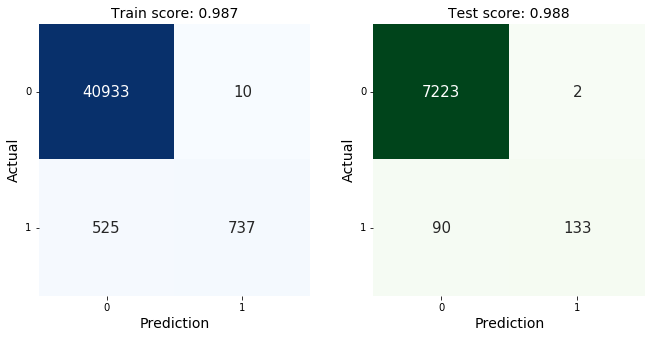

In [80]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, best_XGB)

In [37]:
print(classification_report(y_test,best_XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7225
           1       0.99      0.60      0.74       223

   micro avg       0.99      0.99      0.99      7448
   macro avg       0.99      0.80      0.87      7448
weighted avg       0.99      0.99      0.99      7448



In [97]:
eva_metric(best_XGB)

Model :  RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=60, n_jobs=-1,
          param_distributions={'max_depth': [3, 6, 10], 'colsample_bytree': [0.4, 0.6, 0.8], 'n_estimators': [100, 150, 200], 'subsample': [0.4, 0.6, 0.8], 'gamma': [1, 5, 10], 'learning_rate': [0.01, 0.1, 1], 'reg_alpha': [0.01, 0.1, 10], 'reg_lambda': [0.01, 0.1, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)


True Positive :  7223
True Negative :  133
False Positive :  90

## SVM Classifier

### Base

In [70]:
Svm = SVC()

base_svm = Svm.fit(X_train, y_train)

base_svm.score(X_test, y_test)

0.9877819548872181

### Hyperparameter Tuning

In [42]:
sv_params = {'gamma': np.logspace(-3,3,7),
'C': np.logspace(-3, 3, 7),
'class_weight':[{0: x, 1: 1-x} for x in [0.05, 0.15, 0.25, 0.30, 0.35]]}

In [82]:
best_SVM = GridSearchCV(SVC(class_weight={0:0.25,1:0.75}), sv_params, cv=5, n_jobs=-1, verbose=1)
best_SVM.fit(X_train, y_train)

print(best_SVM.best_params_)
print(best_SVM.score(X_train, y_train), best_SVM.best_score_, best_SVM.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed: 29.5min finished


{'C': 10.0, 'gamma': 0.1}
0.987300082928563 0.9872290013031632 0.9876476906552094


## Evaluation Matrix for Best SVM

In [84]:
auc_svm = roc_auc_score(y_test, best_SVM.predict(X_test) )
auc_svm

0.8045867146647633

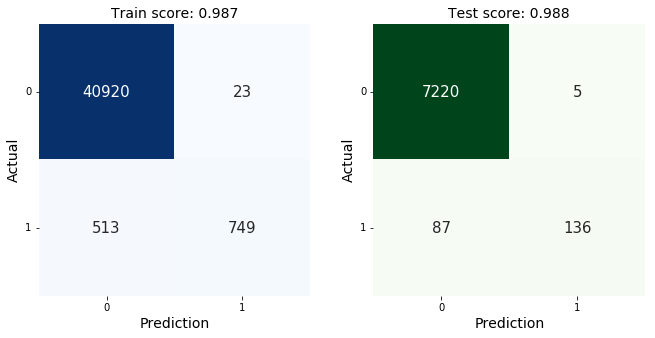

In [86]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, best_SVM)

In [87]:
print(classification_report(y_test,best_SVM.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7225
           1       0.96      0.61      0.75       223

   micro avg       0.99      0.99      0.99      7448
   macro avg       0.98      0.80      0.87      7448
weighted avg       0.99      0.99      0.99      7448



In [96]:
eva_metric(best_SVM)

Model :  GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight={0: 0.25, 1: 0.75}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)


True Positive :  7220
True Negative :  136
False Positive :  87
False Negative :  5


Balanced Accuracy : 0.8045867146647633
F1 Score : 0.7472527472527472
Recall Score : 0.6098654708520179
Precision Score : 0.9645390070921985

 Classification Report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99   

# Based on Matrix Comparison, the Best Algorithm is Random Forest Classifier with best Parameter

## Save Model

In [46]:
import joblib

joblib.dump(best_Forest.best_estimator_, "modelAttrition")

## Test Prediction by Random Data

In [57]:
model = best_Forest.best_estimator_
model.predict_proba([[55,25,1,1,0,1]])

array([[0.84386824, 0.15613176]])